# HCPC temperature

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools.datasets import load_temperature2
X = load_temperature2( )
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Bordeaux to Dublin
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     25 non-null     float64
 1   Fev     25 non-null     float64
 2   Mars    25 non-null     float64
 3   Avril   25 non-null     float64
 4   Mai     25 non-null     float64
 5   Juin    25 non-null     float64
 6   Juil    25 non-null     float64
 7   Août    25 non-null     float64
 8   Sept    25 non-null     float64
 9   Oct     25 non-null     float64
 10  Nov     25 non-null     float64
 11  Dec     25 non-null     float64
 12  moy     15 non-null     float64
 13  amp     15 non-null     float64
 14  Lati    15 non-null     float64
 15  Long    15 non-null     float64
 16  groupe  15 non-null     object 
dtypes: float64(16), object(1)
memory usage: 3.5+ KB


In [3]:
from scientisttools import PCA
res_pca = PCA(standardize=True,n_components=5,ind_sup=list(range(15,X.shape[0])),quanti_sup=list(range(12,16)),quali_sup=16,parallelize=True)
res_pca.fit(X)

Missing values are imputed by the mean of the variable.


PCA(ind_sup=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24], parallelize=True,
    quali_sup=16, quanti_sup=[12, 13, 14, 15])

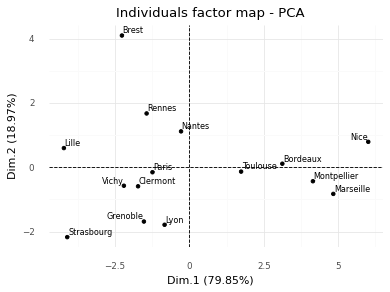

In [4]:
from scientisttools import fviz_pca_ind
p = fviz_pca_ind(res_pca,repel=True,ind_sup=False,quali_sup=False)
print(p)

> L'observation graphique propose 3 groupes :
> * Groupe 1 : Brest, Rennes et Nantes
> * Groupe 2 : Nice, Bordeaux, Toulouse, Montpellier et Marseille
> * Groupe 3 : le reste


In [5]:
from scientisttools import HCPC
res_hcpc = HCPC(res_pca,n_clusters=3)

## Description of quantitatives variables

In [6]:
desc_var = res_hcpc.desc_var_
desc_var.keys()

dict_keys(['quanti_var', 'quanti', 'test_chi2', 'category', 'call'])

### Description of quantitatives variables in overall cluster

In [7]:
quanti_var = desc_var["quanti_var"]
quanti_var

,Eta2,pvalue
moy,0.836587,0.000019
Oct,0.836220,0.000019
Sept,0.830080,0.000024
Fev,0.822729,0.000031
Mars,0.812639,0.000043
Jan,0.811794,0.000044
Nov,0.808300,0.000050
Avril,0.792899,0.000079
Dec,0.787085,0.000093
Août,0.786378,0.000095


### Description of quantitatives variables by cluster

In [8]:
quanti = desc_var["quanti"]
quanti["1"]

,vtest,Mean in category,Overall mean,sd in categorie,Overall sd,pvalue
Sept,3.398358,19.280000,16.986667,0.754718,1.785447,0.000678
moy,3.387913,13.796667,11.813889,0.741069,1.548427,0.000704
Avril,3.329339,12.700000,10.980000,0.579655,1.366846,0.000871
Oct,3.322273,14.540000,12.320000,0.941488,1.767937,0.000893
Mars,3.235769,10.040000,8.233333,0.523832,1.477235,0.001213
Août,3.176011,21.900000,19.566667,0.792465,1.943765,0.001493
Juin,3.003021,19.800000,17.833333,0.726636,1.732692,0.002673
Mai,2.997205,16.080000,14.433333,0.691086,1.453578,0.002725
Nov,2.965719,9.880000,7.926667,0.998799,1.742591,0.003020
Juil,2.915782,22.100000,19.833333,1.003992,2.056750,0.003548


In [9]:
# Cluster 2
quanti["2"]

,vtest,Mean in category,Overall mean,sd in categorie,Overall sd,pvalue
Mai,-2.016380,12.866667,14.433333,0.953357,1.453578,0.043760
Août,-2.021201,17.466667,19.566667,1.087300,1.943765,0.043259
Juin,-2.051475,15.933333,17.833333,1.158543,1.732692,0.040221
Juil,-2.183050,17.433333,19.833333,1.347426,2.056750,0.029032
Long,-2.875244,-2.343333,2.583333,1.376889,3.205624,0.004037
amp,-2.952095,12.366667,15.913333,1.558489,2.247626,0.003156


In [10]:
# Cluster 3
quanti["3"]

,vtest,Mean in category,Overall mean,sd in categorie,Overall sd,pvalue
Sept,-2.046173,15.942857,16.986667,0.738448,1.785447,0.040739
Avril,-2.107041,10.157143,10.980000,0.636637,1.366846,0.035114
moy,-2.603897,10.661905,11.813889,0.620737,1.548427,0.009217
Oct,-2.811187,10.900000,12.320000,0.661168,1.767937,0.004936
Mars,-2.854433,7.028571,8.233333,0.806605,1.477235,0.004311
Nov,-3.152395,6.357143,7.926667,0.654342,1.742591,0.001619
Fev,-3.250132,3.157143,4.833333,0.763183,1.805055,0.001154
Dec,-3.283930,3.071429,4.846667,0.911379,1.892042,0.001024
Jan,-3.355280,2.114286,3.973333,0.875750,1.939232,0.000793


## Description by individuals

In [11]:
desc_ind = res_hcpc.desc_ind_
desc_ind.keys()

dict_keys(['para', 'dist'])

### Paragons

In [12]:
para = desc_ind["para"]
para["Cluster : 1"]

Montpellier    0.175490
Bordeaux       1.302643
Marseille      1.423228
Nice           5.027258
Toulouse       5.088993
Name: distance, dtype: float64

In [13]:
para["Cluster : 2"]

Rennes    0.410280
Nantes    2.514486
Brest     4.182422
Name: distance, dtype: float64

In [14]:
para["Cluster : 3"]

Vichy       0.183210
Clermont    0.446900
Grenoble    1.401182
Paris       1.793753
Lyon        2.822719
Name: distance, dtype: float64

## Description by axis

In [15]:
desc_axes = res_hcpc.desc_axes_
desc_axes.keys()

dict_keys(['quanti_var', 'quanti', 'call'])

In [16]:
desc_axes["quanti_var"]

,Eta2,pvalue
Dim.1,0.834734,0.000020
Dim.2,0.633565,0.002421


In [17]:
desc_axes_quanti = desc_axes["quanti"]
desc_axes_quanti["1"]

,vtest,Mean in category,Overall mean,sd in categorie,Overall sd,pvalue
Dim.1,3.392217,3.968786,-4.144833e-15,1.45853,3.095445,0.000693


In [18]:
desc_axes_quanti["2"]

,vtest,Mean in category,Overall mean,sd in categorie,Overall sd,pvalue
Dim.2,2.843227,2.292998,2.116825e-15,1.293129,1.50878,0.004466


In [19]:
desc_axes_quanti["3"]

,vtest,Mean in category,Overall mean,sd in categorie,Overall sd,pvalue
Dim.2,-2.113402,-0.911045,2.116825e-15,0.927073,1.508780,0.034566
Dim.1,-2.561180,-2.265141,-4.144833e-15,1.260674,3.095445,0.010432


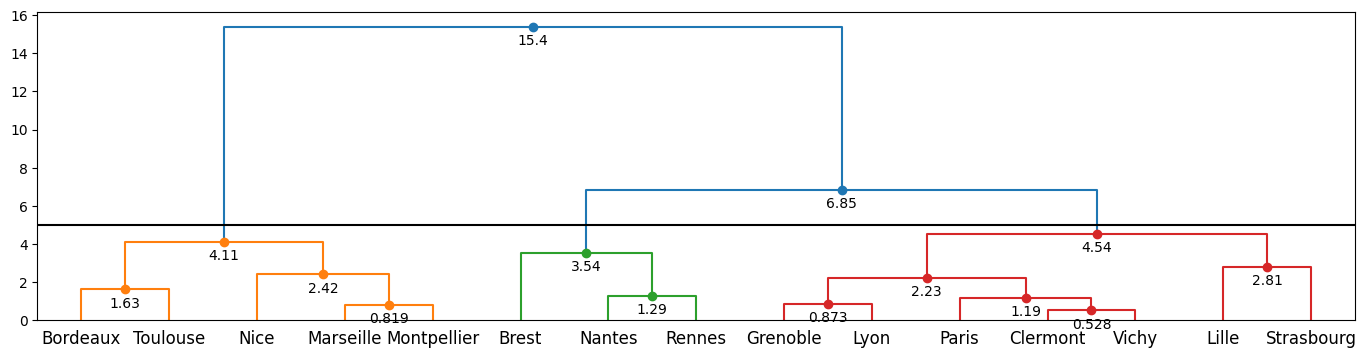

In [20]:
from scientisttools import plot_dendrogram
import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(17,4))
plot_dendrogram(res_hcpc,ax=axe,max_d=5)
plt.show()

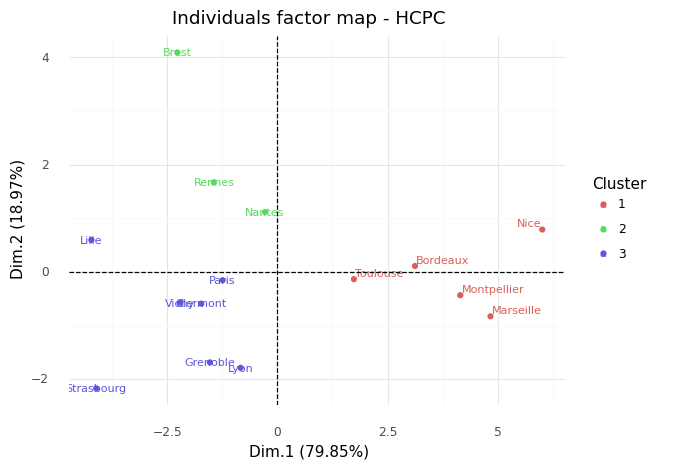

In [21]:
from scientisttools import fviz_hcpc_cluster
p = fviz_hcpc_cluster(res_hcpc,repel=True)
print(p)